Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


Task 1: Feature Selection
1. Objective: Identify the most relevant features from a dataset.
2. Dataset: Use a sample dataset like the Titanic or Iris datasets.
3. Steps:
    Load the dataset.
    Analyze the correlation between features and the target variable.
    Use methods like mutual information or chi-squared test to select important features.
    Document the selected features and explain why they were chosen.


In [3]:
# Load the Iris dataset
iris_data = sns.load_dataset('iris')
iris_data.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


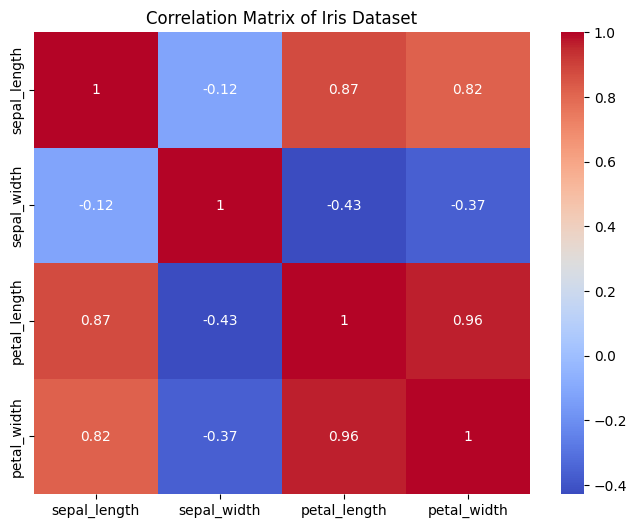

In [5]:
corr_matrix = iris_data.drop(columns='species').corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


In [6]:
# Encode the target variable
le = LabelEncoder()
iris_data['species_encoded'] = le.fit_transform(iris_data['species'])

X = iris_data.drop(columns=['species', 'species_encoded'])
y = iris_data['species_encoded']

In [7]:
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False, inplace=True)

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
chi2_series = pd.Series(chi2_scores, index=X.columns)
chi2_series.sort_values(ascending=False, inplace=True)

# Display Mutual Information and Chi-Squared Scores
print("Mutual Information Scores:")
print(mi_series)
print("\nChi-Squared Scores:")
print(chi2_series)

Mutual Information Scores:
petal_width     0.993840
petal_length    0.988762
sepal_length    0.480347
sepal_width     0.257913
dtype: float64

Chi-Squared Scores:
petal_length    116.312613
petal_width      67.048360
sepal_length     10.817821
sepal_width       3.710728
dtype: float64


Task 2: Feature Transformation
1. Objective: Apply transformations to existing features to improve model performance.
2. Dataset: Use the same dataset as Task 1.
3. Steps:
   Load the dataset.
   Apply transformations such as log transformation, normalization, or standardization


In [8]:
from sklearn.datasets import load_iris
# Loading Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
df = pd.DataFrame(data, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#log transformation
log_transformed = np.log1p(df)
print(log_transformed.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           1.808289          1.504077           0.875469          0.182322
1           1.774952          1.386294           0.875469          0.182322
2           1.740466          1.435085           0.832909          0.182322
3           1.722767          1.410987           0.916291          0.182322
4           1.791759          1.526056           0.875469          0.182322


In [10]:
#normalization
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized, columns=feature_names)
print(normalized_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


In [11]:
# 3. Standardization (Z-score Scaling)
scaler = StandardScaler()
standardized = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized, columns=feature_names)
print(standardized_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Task 3 (Feature Creation)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
# 1. Interaction Terms and Polynomial Features
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df)
poly_feature_names = poly.get_feature_names_out(feature_names)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
print(poly_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sepal length (cm) sepal width (cm)  sepal length (cm) petal length (cm)  \
0                               17.85                                 7.14   
1                               14.70                                 6.86   
2                               15.04                                 6.11   
3                               14.26                                 6.90   
4                               18.00                                 7.00   

   sepal length (cm) petal width (cm)  sepal width (cm) 

Task 3: Feature Creation
1. Objective: Create new features from existing data.
2. Dataset: Use the same dataset as Task 1.
3. Steps:
   Load the dataset.
   Create new features by combining or modifying existing ones (e.g., creating an interaction term, extracting date features, etc.)


In [13]:
# Creating new features as ratios and differences
df['sepal_length_to_sepal_width'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['sepal_length_to_petal_length'] = df['sepal length (cm)'] / df['petal length (cm)']
df['sepal_width_to_petal_width'] = df['sepal width (cm)'] / df['petal width (cm)']
df['sepal_length_minus_sepal_width'] = df['sepal length (cm)'] - df['sepal width (cm)']
df['petal_length_minus_petal_width'] = df['petal length (cm)'] - df['petal width (cm)']
print(df[['sepal_length_to_sepal_width', 'sepal_length_to_petal_length', 'sepal_width_to_petal_width', 'sepal_length_minus_sepal_width', 'petal_length_minus_petal_width']].head())

   sepal_length_to_sepal_width  sepal_length_to_petal_length  \
0                     1.457143                      3.642857   
1                     1.633333                      3.500000   
2                     1.468750                      3.615385   
3                     1.483871                      3.066667   
4                     1.388889                      3.571429   

   sepal_width_to_petal_width  sepal_length_minus_sepal_width  \
0                        17.5                             1.6   
1                        15.0                             1.9   
2                        16.0                             1.5   
3                        15.5                             1.5   
4                        18.0                             1.4   

   petal_length_minus_petal_width  
0                             1.2  
1                             1.2  
2                             1.1  
3                             1.3  
4                             1.2  


Task 4: Polynomial Features
1. Objective: Generate polynomial features to capture non-linear relationships.
2. Dataset: Use a dataset with numerical features, such as the Boston housing dataset.
3. Steps:
   Load the dataset.
   Use the `PolynomialFeatures` class from `sklearn.preprocessing` to generate polynomial features.


In [14]:
# Reload the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Convert to DataFrame for better handling
df = pd.DataFrame(data, columns=feature_names)

# 2. Polynomial Features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(df)
poly_feature_names = poly.get_feature_names_out(feature_names)

# Convert the polynomial features to a DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Print the first few rows of the polynomial features DataFrame
print(poly_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sepal length (cm)^2  sepal length (cm) sepal width (cm)  \
0                26.01                               17.85   
1                24.01                               14.70   
2                22.09                               15.04   
3                21.16                               14.26   
4                25.00                               18.00   

   sepal length (cm) petal length (cm)  sepal length (cm) petal width (cm)  \
0                                 7.14                                1.02

Task 5: Handling Categorical Features
1. Objective: Convert categorical features into numerical features.
2. Dataset: Use a dataset with categorical features, such as the Titanic dataset.
3. Steps:
   Load the dataset.
   Apply encoding techniques like one-hot encoding, label encoding, or target encoding.


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [19]:
target = iris.target
# Adding a hypothetical categorical feature
df['flower_color'] = ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green'] * 25

In [20]:
# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[['flower_color']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['flower_color']))

# Label Encoding
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df['flower_color'])
df['flower_color_label'] = label_encoded

# Hypothetical Target Encoding (using mean target value for simplicity)
target_mean = df.groupby('flower_color')['flower_color'].apply(lambda x: target.mean())

df['flower_color_target_encoded'] = df['flower_color'].map(target_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
print("\nOne-Hot Encoded Data:")
print(onehot_df.head())

print("\nLabel Encoded Data:")
print(df[['flower_color', 'flower_color_label']].head())

print("\nTarget Encoded Data (Hypothetical):")
print(df[['flower_color', 'flower_color_target_encoded']].head())


One-Hot Encoded Data:
   flower_color_Blue  flower_color_Green  flower_color_Red
0                0.0                 0.0               1.0
1                1.0                 0.0               0.0
2                0.0                 1.0               0.0
3                0.0                 0.0               1.0
4                1.0                 0.0               0.0

Label Encoded Data:
  flower_color  flower_color_label
0          Red                   2
1         Blue                   0
2        Green                   1
3          Red                   2
4         Blue                   0

Target Encoded Data (Hypothetical):
  flower_color  flower_color_target_encoded
0          Red                          1.0
1         Blue                          1.0
2        Green                          1.0
3          Red                          1.0
4         Blue                          1.0
